# CREDIT CARD FRAUD DETECTION

Step 1: Import Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


Step 2: Load and Explore the Dataset

In [3]:
data = pd.read_csv("C:\\Users\\Narthana\\Downloads\\creditcard.csv")


Step 3: Data Cleaning and Preprocessing

Data cleaning and preprocessing are crucial to prepare the data for model training. Some common steps include:

Handling missing values (if any).
Scaling numerical features (e.g., 'Amount' and 'Time').

In [4]:
# Check for missing values
print(data.isnull().sum())

# Scaling numerical features
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))
data['Time'] = scaler.fit_transform(data['Time'].values.reshape(-1, 1))


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


Step 4: Exploratory Data Analysis (EDA)


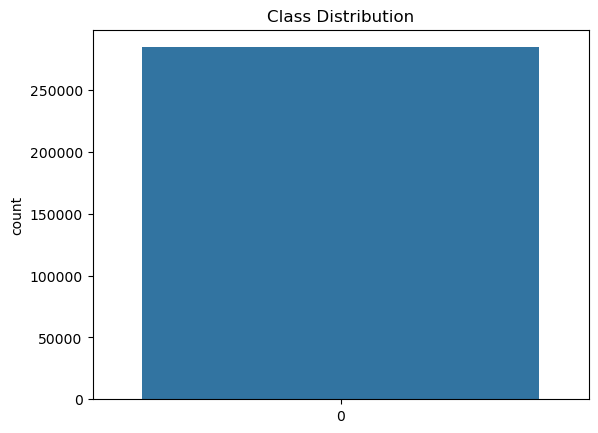

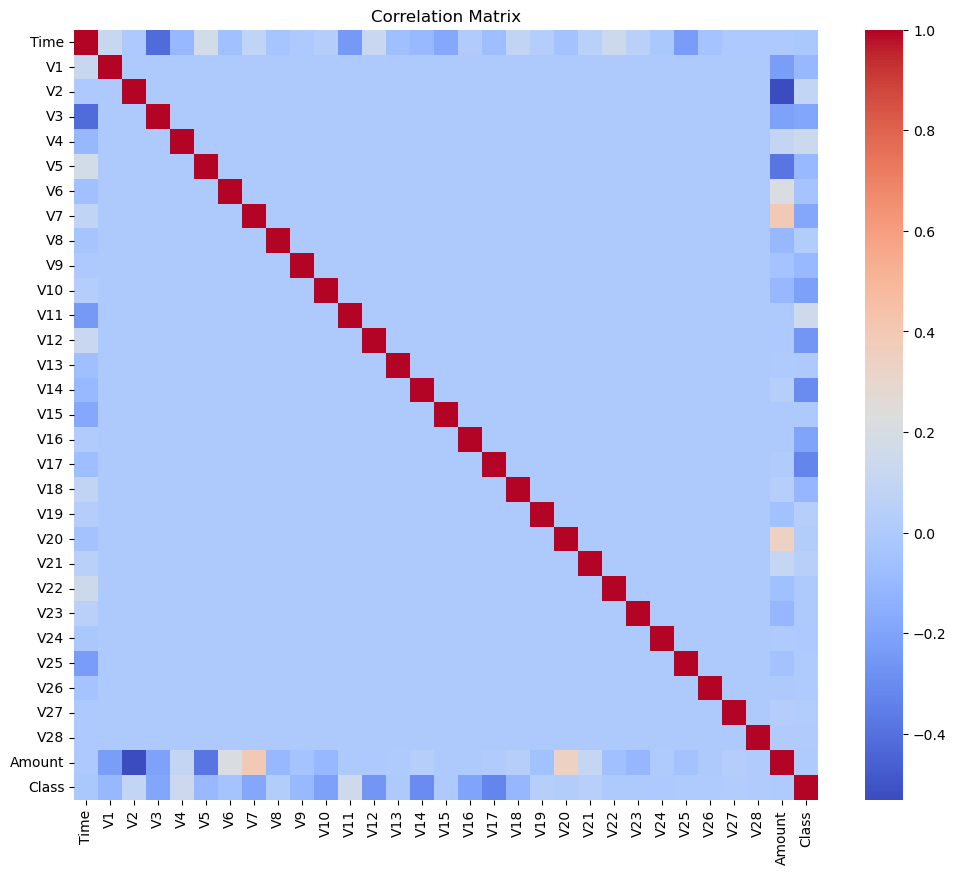

In [5]:
# Distribution of class (fraudulent vs. genuine)
sns.countplot(data['Class'])
plt.title('Class Distribution')
plt.show()

# Correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix')
plt.show()


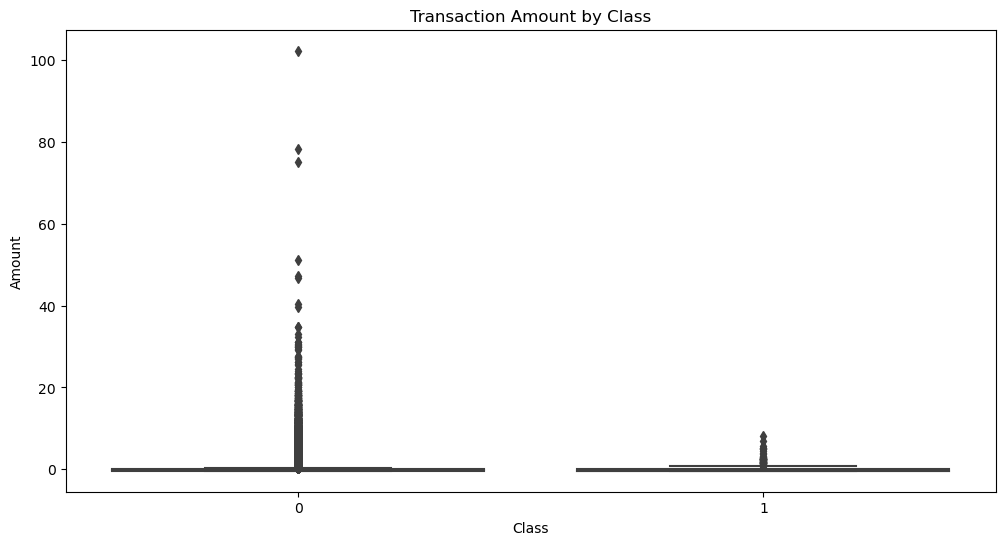

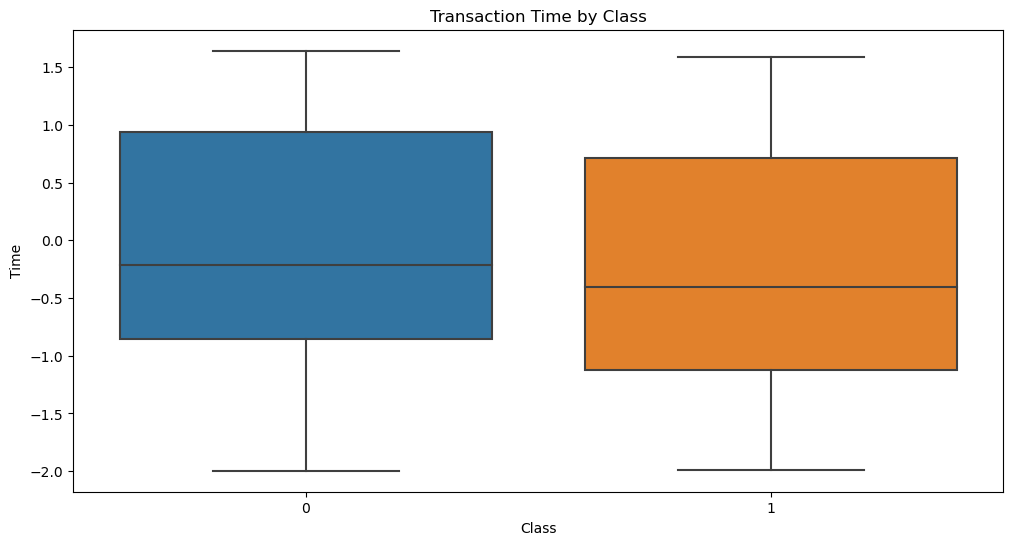

In [6]:
# Visualizing the distribution of 'Amount' for different classes
plt.figure(figsize=(12, 6))
sns.boxplot(x='Class', y='Amount', data=data)
plt.title('Transaction Amount by Class')
plt.show()

# Visualizing the distribution of 'Time' for different classes
plt.figure(figsize=(12, 6))
sns.boxplot(x='Class', y='Time', data=data)
plt.title('Transaction Time by Class')
plt.show()


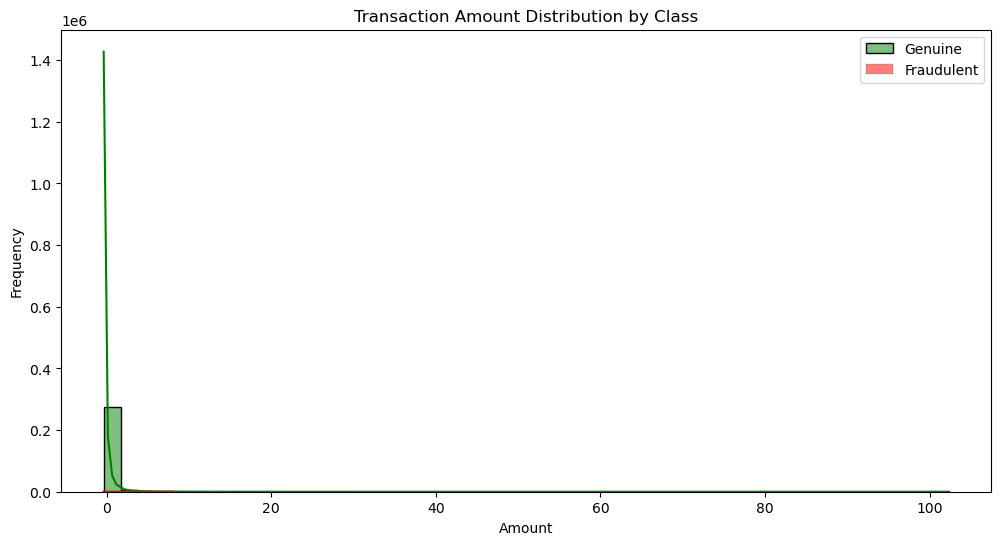

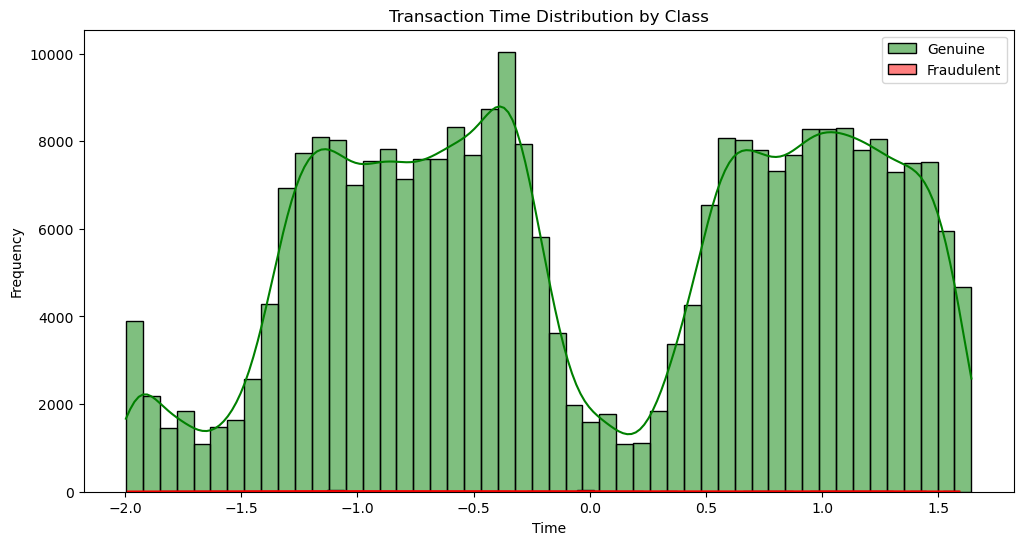

In [7]:
# Visualizing the distribution of 'Amount' using histograms
plt.figure(figsize=(12, 6))
sns.histplot(data[data['Class'] == 0]['Amount'], bins=50, color='g', label='Genuine', kde=True)
sns.histplot(data[data['Class'] == 1]['Amount'], bins=50, color='r', label='Fraudulent', kde=True)
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.legend()
plt.title('Transaction Amount Distribution by Class')
plt.show()

# Visualizing the distribution of 'Time' using histograms
plt.figure(figsize=(12, 6))
sns.histplot(data[data['Class'] == 0]['Time'], bins=50, color='g', label='Genuine', kde=True)
sns.histplot(data[data['Class'] == 1]['Time'], bins=50, color='r', label='Fraudulent', kde=True)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.legend()
plt.title('Transaction Time Distribution by Class')
plt.show()

Step 5: Handling Class Imbalance

In [8]:
X = data.drop('Class', axis=1)
y = data['Class']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handling class imbalance using oversampling
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Handling class imbalance using undersampling
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)


Step 6: Model Training and Evaluation

In [9]:
# Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_resampled, y_train_resampled)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Model evaluation
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')
    print(f'Confusion Matrix:\n{conf_matrix}')
    print(classification_report(y_test, y_pred))

# Evaluate Logistic Regression model
print("Logistic Regression Model:")
evaluate_model(lr_model, X_test, y_test)

# Evaluate Random Forest model
print("\nRandom Forest Model:")
evaluate_model(rf_model, X_test, y_test)


Logistic Regression Model:
Accuracy: 0.9634844282153014
Precision: 0.04205175600739371
Recall: 0.9285714285714286
F1 Score: 0.08045977011494253
Confusion Matrix:
[[54791  2073]
 [    7    91]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.93      0.08        98

    accuracy                           0.96     56962
   macro avg       0.52      0.95      0.53     56962
weighted avg       1.00      0.96      0.98     56962


Random Forest Model:
Accuracy: 0.9761771005231558
Precision: 0.06375606375606375
Recall: 0.9387755102040817
F1 Score: 0.11940298507462686
Confusion Matrix:
[[55513  1351]
 [    6    92]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.94      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.96      0.55     56962
weighted avg       1

Step 7: Interpretation and Inference

Precision: The percentage of transactions predicted as fraudulent that were actually fraudulent. A high precision means fewer false positives.

Recall: The percentage of actual fraudulent transactions that were correctly predicted. A high recall means fewer false negatives.

F1 Score: The harmonic mean of precision and recall. It balances precision and recall.

ROC Curve (Receiver Operating Characteristic Curve):

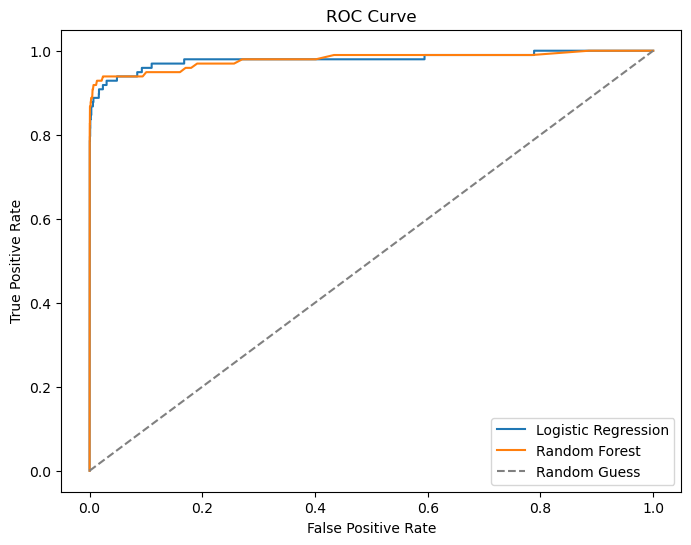

In [10]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate ROC curve for Logistic Regression model
y_pred_proba_lr = lr_model.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_proba_lr)

# Calculate ROC curve for Random Forest model
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


Precision-Recall Curve:

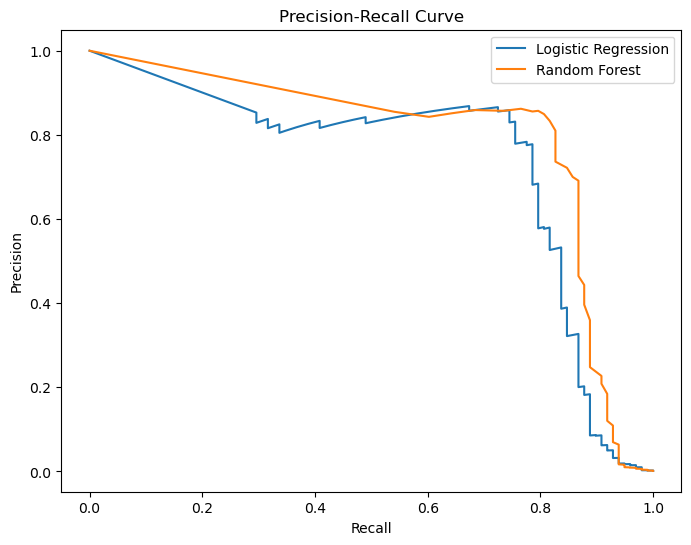

In [11]:
from sklearn.metrics import precision_recall_curve

# Calculate precision-recall curve for Logistic Regression model
precision_lr, recall_lr, thresholds_lr = precision_recall_curve(y_test, y_pred_proba_lr)

# Calculate precision-recall curve for Random Forest model
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, y_pred_proba_rf)

# Plot precision-recall curves
plt.figure(figsize=(8, 6))
plt.plot(recall_lr, precision_lr, label='Logistic Regression')
plt.plot(recall_rf, precision_rf, label='Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


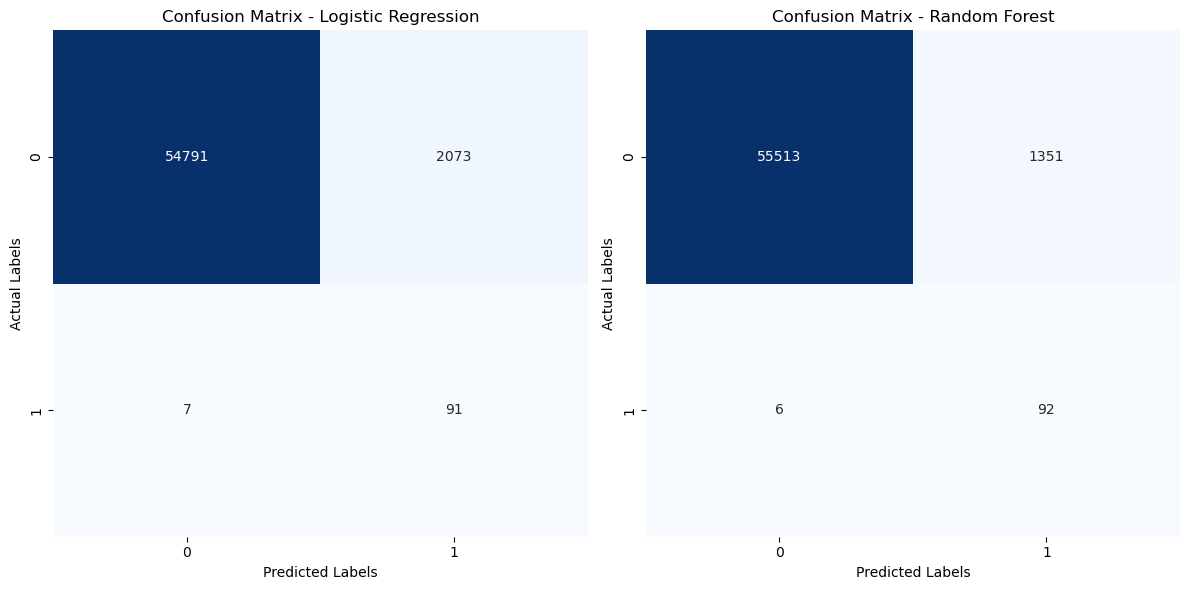

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predictions for Logistic Regression
y_pred_lr = lr_model.predict(X_test)

# Predictions for Random Forest
y_pred_rf = rf_model.predict(X_test)

# Create confusion matrices
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrices
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix - Logistic Regression')

plt.subplot(1, 2, 2)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix - Random Forest')

plt.tight_layout()
plt.show()


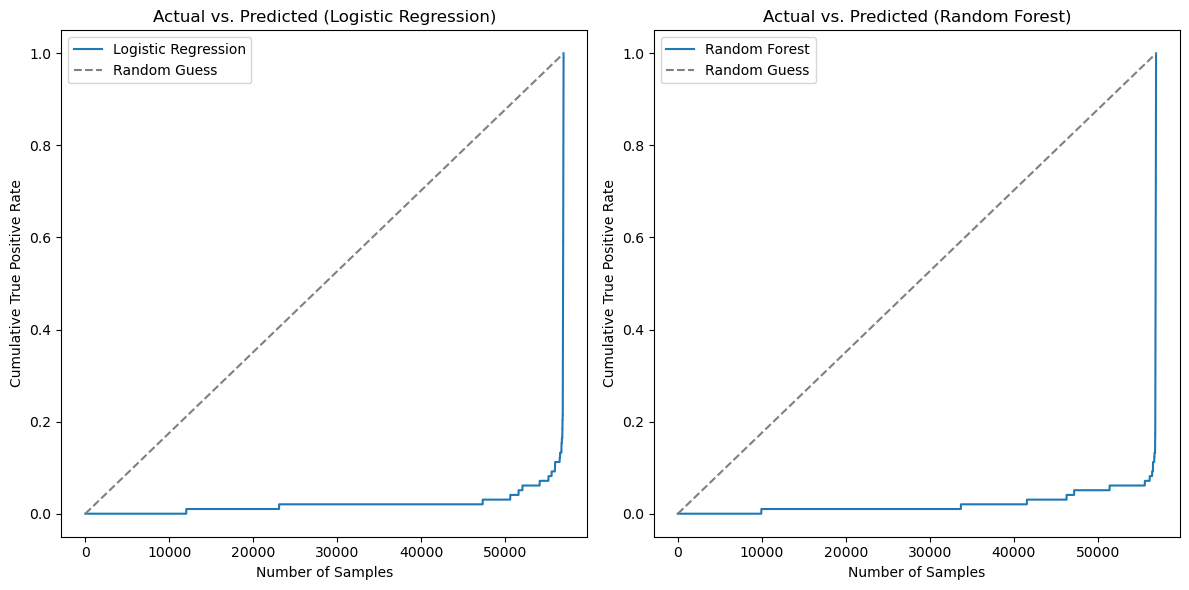

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Predict probabilities for both models
y_pred_proba_lr = lr_model.predict_proba(X_test)[:, 1]
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Create an array of indices to sort the actual values by predicted probabilities
sort_indices_lr = np.argsort(y_pred_proba_lr)
sort_indices_rf = np.argsort(y_pred_proba_rf)

# Sort the actual values by predicted probabilities for both models
y_true_sorted_lr = np.array(y_test)[sort_indices_lr]
y_true_sorted_rf = np.array(y_test)[sort_indices_rf]

# Sort the predicted probabilities for both models
y_pred_sorted_lr = y_pred_proba_lr[sort_indices_lr]
y_pred_sorted_rf = y_pred_proba_rf[sort_indices_rf]

# Create an array representing the cumulative sum of true labels (for ROC curve)
cumulative_sum_lr = np.cumsum(y_true_sorted_lr) / sum(y_true_sorted_lr)
cumulative_sum_rf = np.cumsum(y_true_sorted_rf) / sum(y_true_sorted_rf)

# Create a line graph for actual vs. predicted values for both models
plt.figure(figsize=(12, 6))

# Logistic Regression
plt.subplot(1, 2, 1)
plt.plot(np.arange(len(y_true_sorted_lr)), cumulative_sum_lr, label='Logistic Regression', linestyle='-')
plt.plot([0, len(y_true_sorted_lr)], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('Number of Samples')
plt.ylabel('Cumulative True Positive Rate')
plt.title('Actual vs. Predicted (Logistic Regression)')
plt.legend()

# Random Forest
plt.subplot(1, 2, 2)
plt.plot(np.arange(len(y_true_sorted_rf)), cumulative_sum_rf, label='Random Forest', linestyle='-')
plt.plot([0, len(y_true_sorted_rf)], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('Number of Samples')
plt.ylabel('Cumulative True Positive Rate')
plt.title('Actual vs. Predicted (Random Forest)')
plt.legend()

plt.tight_layout()
plt.show()


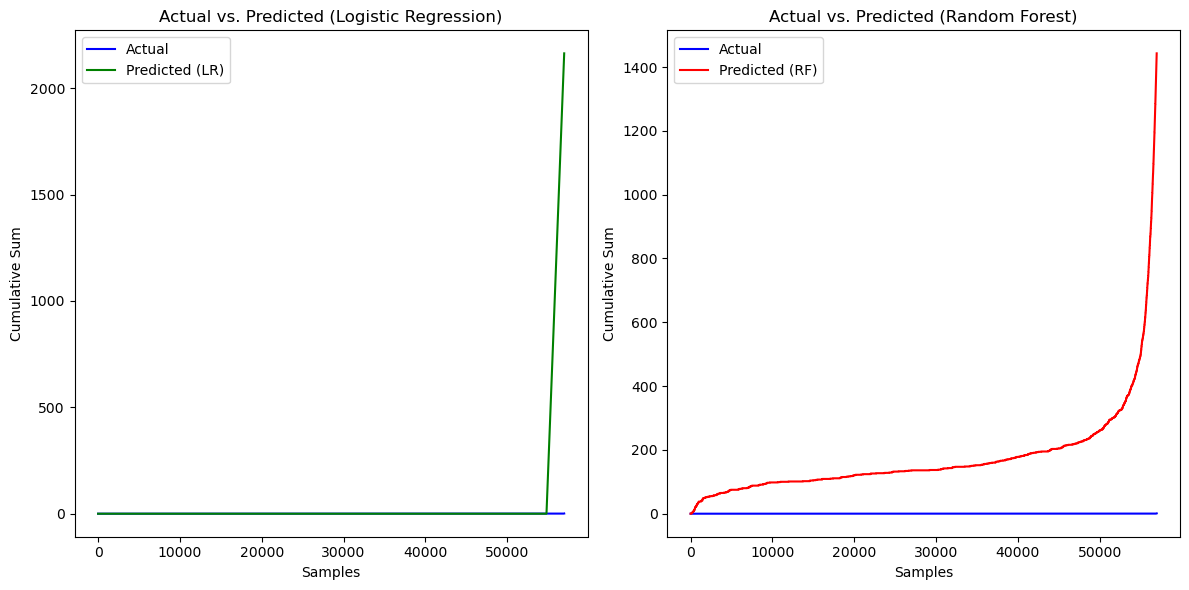

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Predictions for both models
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Create an array of indices for sorting
sort_indices = np.argsort(y_pred_proba_lr)

# Sort the actual values and predictions by predicted probabilities
y_true_sorted = np.array(y_test)[sort_indices]
y_pred_sorted_lr = y_pred_lr[sort_indices]
y_pred_sorted_rf = y_pred_rf[sort_indices]

# Create an array representing the cumulative sum of true labels
cumulative_sum_true = np.cumsum(y_true_sorted) / sum(y_true_sorted)

# Create line graphs for actual vs. predicted values for both models
plt.figure(figsize=(12, 6))

# Logistic Regression
plt.subplot(1, 2, 1)
plt.plot(np.arange(len(y_true_sorted)), cumulative_sum_true, label='Actual', linestyle='-', color='blue')
plt.plot(np.arange(len(y_pred_sorted_lr)), np.cumsum(y_pred_sorted_lr), label='Predicted (LR)', linestyle='-', color='green')
plt.xlabel('Samples')
plt.ylabel('Cumulative Sum')
plt.title('Actual vs. Predicted (Logistic Regression)')
plt.legend()

# Random Forest
plt.subplot(1, 2, 2)
plt.plot(np.arange(len(y_true_sorted)), cumulative_sum_true, label='Actual', linestyle='-', color='blue')
plt.plot(np.arange(len(y_pred_sorted_rf)), np.cumsum(y_pred_sorted_rf), label='Predicted (RF)', linestyle='-', color='red')
plt.xlabel('Samples')
plt.ylabel('Cumulative Sum')
plt.title('Actual vs. Predicted (Random Forest)')
plt.legend()

plt.tight_layout()
plt.show()
